# Resources

* [Learning Tensorflow](https://learningtensorflow.com/)

* [Visualisation with TensorBoard](http://learningtensorflow.com/Visualisation/)

In [1]:
import tensorflow as tf
import numpy as np

/home/alarcj/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Basics

## Variables

The big idea in Tensorflow is to build a computation graph and then feed it whatever data you want it to operate on.

When we call `tensorflow.global_variables_initializer()`, a graph of the dependencies between variables is created. 

In [2]:
# Python
#
# x = 5
# y = x + 5
# print(y)

x = tf.constant(5, dtype=tf.float32, name='x')
y = tf.Variable(x+5, dtype=tf.float32, name='y')
print(y)

model = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(model)
    print(session.run(y))

<tf.Variable 'y:0' shape=() dtype=float32_ref>
10.0


In [3]:
# Arrays as input to tf.constants.

x = tf.constant([0, 5, 10], dtype=tf.float32, name='x')
y = tf.Variable(x+5, dtype=tf.float32, name='y')

model = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(model)
    print(session.run(y))

[ 5. 10. 15.]


In [4]:
# Numpy arrays as input to tf.constants.

data = np.random.randint(0, high=10000, size=10000)

x = tf.constant(data, dtype=tf.float32, name='x')                  
y = tf.Variable((5 * x**2) - (3*x) + 15, dtype=tf.float32, name='y') 

model = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(model)
    print(session.run(y))

[3.9424538e+08 5.4023300e+05 1.0441080e+08 ... 3.9700288e+08 7.9017000e+04
 1.1057695e+08]


In [5]:
# Update tf.Variables in loops.

x = tf.Variable(initial_value=0, dtype=tf.float32, name='x')

model = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(model)
    for i in range(5):
        x = x + 1
        print(session.run(x))

1.0
2.0
3.0
4.0
5.0


In [6]:
# Compute the moving average of a series of randomly generated numbers.

mean = tf.Variable(initial_value=0.0, dtype=tf.float32, name='mean')
n    = tf.Variable(initial_value=0.0, dtype=tf.float32, name='n')

m = 1000

model = tf.global_variables_initializer()
with tf.Session() as session:
    for i in range(5):
        sum_of_rand_numbers = np.sum( np.random.randint(0, high=1000, size=m) )
        
        n = n + m
        
        mean = (mean * (n-m)/n) + (sum_of_rand_numbers/n)
    
    session.run(model)
    print(session.run(mean))

506.0322


In [7]:
# Tensorboard - run: tensorboard --logdir=/tmp/basic

x = tf.constant(5, dtype=tf.float32, name='x')
print(x)
y = tf.Variable(x+5, dtype=tf.float32, name='y')
print(y)


with tf.Session() as session:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("/tmp/basic", session.graph)
    model  = tf.global_variables_initializer()
    
    session.run(model)
    print(session.run(y))

Tensor("x_4:0", shape=(), dtype=float32)
<tf.Variable 'y_3:0' shape=() dtype=float32_ref>
10.0


## Arrays and Images

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

(5528, 3685, 3)


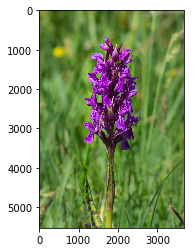

In [9]:
image = mpimg.imread(os.getcwd() + "/flower.jpg")

print(image.shape)

plt.imshow(image)
plt.show()

### Geomatric Manipulation

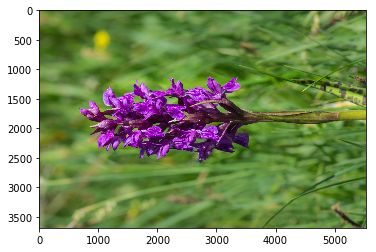

In [10]:
# Transpose an image - turn 90 degrees counter-clockwise.

img = mpimg.imread('flower.jpg')

x = tf.Variable(img, name='x')

model = tf.global_variables_initializer()

with tf.Session() as session:
    x = tf.transpose(x, perm=[1, 0, 2])
    session.run(model)
    result = session.run(x)


plt.imshow(result)
plt.show()

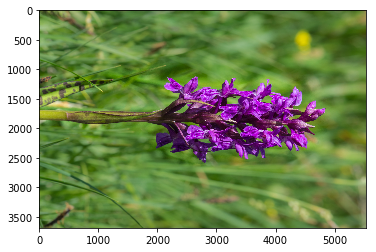

In [35]:
plt.imshow(result2)
plt.show()

(5528, 3685, 3)


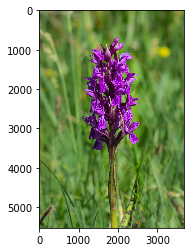

In [17]:
# Flip and image left to right.

img = mpimg.imread('flower.jpg')
height, width, depth = img.shape

# Create a TensorFlow Variable
x = tf.Variable(img, name='x')

model = tf.global_variables_initializer()
with tf.Session() as session:
    # input, seq_lengths, seq_axis, batch_dim
    #x = tf.reverse_sequence(x, [width] * height, 1, batch_dim=0)
    x = tf.reverse_sequence(x, np.ones((height,)) * width, 1, batch_dim=0)
    #
    # It iterates over the image top to bottom (along its height), and slices 
    # left to right (along its width). From here, it then takes a slice of size
    # width, where width is the width of the image.
    session.run(model)
    result = session.run(x)

print(result.shape)
plt.imshow(result)
plt.show()

(3685, 5528, 3)
(3685, 5528, 3)


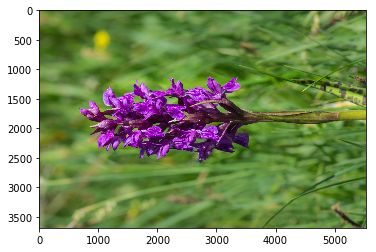

In [34]:
# Transpose the image clock-wise.

image = mpimg.imread('flower.jpg')
height, width, depth = image.shape

x = tf.Variable(image, name='x')
y = tf.transpose(x, perm=[1, 0, 2])
z = tf.transpose(y, perm=[1, 0, 2])

model = tf.global_variables_initializer()
with tf.Session() as session:
    flip = tf.reverse_sequence(y, np.ones((width,)) * height, 1, batch_dim=0)
    
    for i in range(1):
        session.run(model)
        result = session.run(y)
        result2 = session.run(flip)
        
print(result.shape)
print(result2.shape)
plt.imshow(result)
plt.show() 

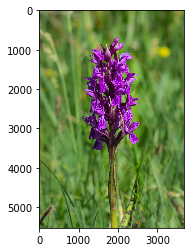

In [21]:
# Another version of flip left-to-right.

image = mpimg.imread('flower.jpg')

x = tf.Variable(image, name='x')
                                                                                
model = tf.global_variables_initializer()
with tf.Session() as session:
    # Get the shape of the image. This allows us to run the code on any image.
    shape = tf.shape(x)
    
    session.run(model)
    shape = session.run(shape)
    
    # Try `tf.ones_initializer` to make this more robust!
    x = tf.reverse_sequence(x, np.ones((shape[0],)) * shape[1], 1, batch_axis=0)
    session.run(model)
    result = session.run(x)
    
plt.imshow(result)
plt.show()  

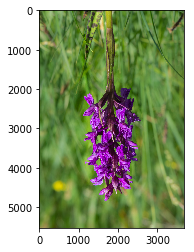

In [22]:
# Flip image upside down.

image = mpimg.imread('flower.jpg')

x = tf.Variable(image, name='x')
                                                                                
model = tf.global_variables_initializer()
with tf.Session() as session:
    # Note swapped dims in the last two parameters.
    x = tf.reverse_sequence(x, np.ones((width,)) * height, 0, batch_axis=1)
    session.run(model)
    result = session.run(x) 
    
plt.imshow(result)
plt.show() 

Original: (5528, 3685, 3)
Mirrored: (5528, 3684, 3)


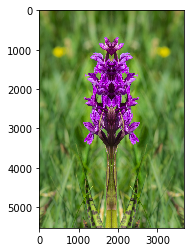

In [23]:
# Compute a mirror - first half of the image is copied, flipped left-right, and then copied on the second half.

image = mpimg.imread('flower.jpg')
height, width, depth = image.shape
print("Original: {}".format(image.shape))                                                  

x = tf.Variable(image, name='x')

mirror_mask = np.ones((height,)) * (width/2)

model = tf.global_variables_initializer()
with tf.Session() as session:
    # Get the left half of the image.
    left_side = tf.slice(x, [0,0,0], [-1, width//2, -1])
    
    # Note swapped dims in the last two parameters.
    mirrored = tf.reverse_sequence(left_side, mirror_mask, 1, batch_axis=0)
    
    # Get the left half of the image.
    left_side = tf.slice(x, [0,0,0], [-1, width//2, -1])
    
    # Now stich them back up again.
    stiched = tf.concat(axis=1, values=[left_side, mirrored])
    
    session.run(model)
    result = session.run(stiched)
    
print("Mirrored: {}".format(result.shape))
plt.imshow(result)
plt.show() 

# Matrix Multiplication

We will start working with `tf.placeholders` which allow us to build our computation graph and define operations without actually needing to input any data.

We use `placeholders` to feed data in whenver we actually need to do any work.

In [ ]:
v = tf.placeholder(tf.float32)
A = tf.placeholder(tf.float32, shape=(5,5), name='A')

x = tf.matmul(A, v)